In [1]:
%load_ext rpy2.ipython
%R require(ggplot2)

/Users/aug/.pyenv/versions/jupyter3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)


array([1], dtype=int32)

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import pylab as plb
from scipy import stats

In [4]:
import pandas as pd

In [5]:
df = pd.read_table('dnasp_out.out', engine='python', skipfooter=3)

In [8]:
df

,Datafile,Region,Ingroup,Outgroup,n,Sites,NetSites,S,Eta,Hap,...,G+Gc,G+Ctot,TajimaD,SigD,FuLiD*,SigD.1,FuLiF*,SigF,FuFs,sRNA
0,RsaB_cmaligned_no_dots.fas,1-55,16,0,16,55,55,0,0,1,...,0.0,0.2545,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,RsaB
1,RsaF_cmaligned_no_dots.fas,1-119,16,0,16,119,119,2,2,3,...,0.0,0.2605,1.6871,n.s.,0.9071,n.s.,1.2678,n.s.,0.995,RsaF
2,SAUSA300s005_ffs_cmaligned_no_dots.fas,1-270,16,0,16,270,270,1,1,2,...,0.0,0.4852,-1.1622,n.s.,-1.4529,n.s.,-1.5682,n.s.,-0.700,SAUSA300s005_ffs
3,SAUSA300s006_tmRNA_cmaligned_no_dots.fas,1-361,16,0,16,361,359,10,10,5,...,0.0,0.4443,0.0759,n.s.,0.0945,n.s.,0.1028,n.s.,1.502,SAUSA300s006_tmRNA
4,SAUSA300s009_cmaligned_no_dots.fas,1-224,16,0,16,224,223,1,1,2,...,0.0,0.3094,1.4737,n.s.,0.6883,n.s.,1.0133,n.s.,1.333,SAUSA300s009
5,SAUSA300s010_cmaligned_no_dots.fas,1-196,16,0,16,196,195,1,1,2,...,0.0,0.3183,-1.1622,n.s.,-1.4529,n.s.,-1.5682,n.s.,-0.700,SAUSA300s010
6,SAUSA300s011_cmaligned_no_dots.fas,1-195,16,0,16,195,195,0,0,1,...,0.0,0.3692,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,SAUSA300s011
7,SAUSA300s016_cmaligned_no_dots.fas,1-199,16,0,16,199,199,3,3,4,...,0.0,0.3361,-0.4941,n.s.,-1.1215,n.s.,-1.0921,n.s.,-0.893,SAUSA300s016
8,SAUSA300s019_cmaligned_no_dots.fas,1-220,16,0,16,220,219,1,1,2,...,0.0,0.3154,-1.1622,n.s.,-1.4529,n.s.,-1.5682,n.s.,-0.700,SAUSA300s019
9,SAUSA300s024_glmS_cmaligned_no_dots.fas,1-217,16,0,16,217,217,1,1,2,...,0.0,0.3641,-1.1622,n.s.,-1.4529,n.s.,-1.5682,n.s.,-0.700,SAUSA300s024_glmS


In [7]:
df['sRNA'] = df['Datafile'].apply(lambda x: x.split('_cmaligned')[0])

In [9]:
df.set_index('sRNA', inplace=True)

In [16]:
%store -r sa_age_bins

In [20]:
df = df.join(sa_age_bins[['age_bin']])

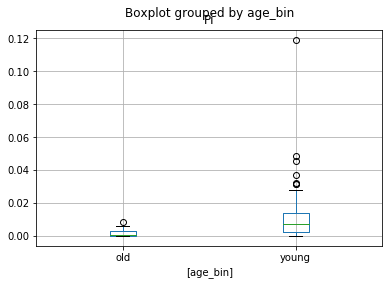

In [21]:
df[['Pi', 'age_bin']].boxplot(by='age_bin')

In [22]:
df.age_bin.value_counts()

young    57
old      18
Name: age_bin, dtype: int64

In [24]:
df

,Datafile,Region,Ingroup,Outgroup,n,Sites,NetSites,S,Eta,Hap,...,G+Gc,G+Ctot,TajimaD,SigD,FuLiD*,SigD.1,FuLiF*,SigF,FuFs,age_bin
sRNA,,,,,,,,,,,,,,,,,,,,,
RsaB,RsaB_cmaligned_no_dots.fas,1-55,16,0,16,55,55,0,0,1,...,0.0,0.2545,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,young
RsaF,RsaF_cmaligned_no_dots.fas,1-119,16,0,16,119,119,2,2,3,...,0.0,0.2605,1.6871,n.s.,0.9071,n.s.,1.2678,n.s.,0.995,young
SAUSA300s005_ffs,SAUSA300s005_ffs_cmaligned_no_dots.fas,1-270,16,0,16,270,270,1,1,2,...,0.0,0.4852,-1.1622,n.s.,-1.4529,n.s.,-1.5682,n.s.,-0.700,old
SAUSA300s006_tmRNA,SAUSA300s006_tmRNA_cmaligned_no_dots.fas,1-361,16,0,16,361,359,10,10,5,...,0.0,0.4443,0.0759,n.s.,0.0945,n.s.,0.1028,n.s.,1.502,old
SAUSA300s009,SAUSA300s009_cmaligned_no_dots.fas,1-224,16,0,16,224,223,1,1,2,...,0.0,0.3094,1.4737,n.s.,0.6883,n.s.,1.0133,n.s.,1.333,old
SAUSA300s010,SAUSA300s010_cmaligned_no_dots.fas,1-196,16,0,16,196,195,1,1,2,...,0.0,0.3183,-1.1622,n.s.,-1.4529,n.s.,-1.5682,n.s.,-0.700,old
SAUSA300s011,SAUSA300s011_cmaligned_no_dots.fas,1-195,16,0,16,195,195,0,0,1,...,0.0,0.3692,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,old
SAUSA300s016,SAUSA300s016_cmaligned_no_dots.fas,1-199,16,0,16,199,199,3,3,4,...,0.0,0.3361,-0.4941,n.s.,-1.1215,n.s.,-1.0921,n.s.,-0.893,young
SAUSA300s019,SAUSA300s019_cmaligned_no_dots.fas,1-220,16,0,16,220,219,1,1,2,...,0.0,0.3154,-1.1622,n.s.,-1.4529,n.s.,-1.5682,n.s.,-0.700,old


In [26]:
rdf = df[['Pi','age_bin']]

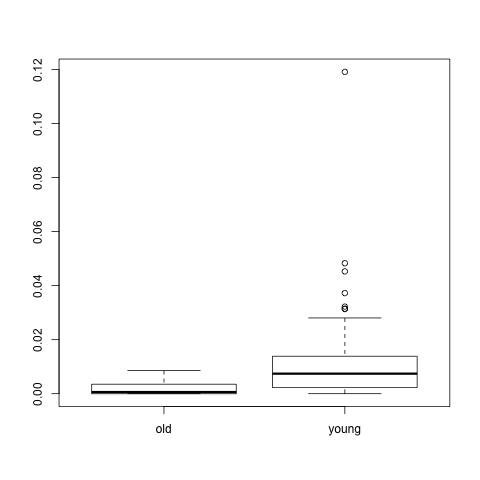

In [27]:
%%R -i rdf
boxplot(Pi ~ age_bin, data = rdf)

In [28]:
%R kruskal.test(Pi ~ age_bin, data=rdf)

statistic
15.041804
parameter
1
p.value
0.000105
method
'Kruskal-Wallis rank sum test'
data.name
'Pi by age_bin'


In [35]:
%R dunn.test


Error in withVisible({ : object 'dunn.test' not found


/Users/aug/.pyenv/versions/jupyter3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Error in withVisible({ : object 'dunn.test' not found

  warnings.warn(x, RRuntimeWarning)


In [ ]:
cd ~/workspace/bio/sRNA/staph_aureus/